## Hypothesis Testing

#### For each of the following questions, 
#### - formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. 

#### Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

### 1. Has the network latency gone up since we switched internet service providers?


#### 1. - Null Hypothesis

There is no difference in network latency since changing internet providers.

#### 1. - Alternative Hypothesis

There is a difference in network latency since changing internet providers.

#### 1. - True Positive

There IS a difference in network latency and we conclude there is a difference in network latency. 

#### 1. - True Negative

There is NO difference in network latency and we conclude there is no difference in network latency 

#### 1. - Type I Error

We reject (accepting as false) the hypothesis that there was no difference in latency, when in fact, there was no difference in latency, and the hypothesis was true. 


#### 1. - Type II Error

We failed to reject (accepting as true) the hypothesis that there was no difference in latency, when in fact, there was a difference in latency, and the hypothesis was false. 

### 2. Is the website redesign any good?


#### 2. - Null Hypothesis

There is no difference in the number of website visits per day since the redesign date. 

#### 2 - Alternative Hypothesis

There is a difference in the number of website visits per day since the redesign date. 

#### 2. - True Positive

There IS a difference in website visits per day since the redesign date, and we conclude there is a difference in website visits per day since the redesign date. 

#### 2. - True Negative

There is NO difference in webstie visits per day since the redesign date and we conclude there is no differencce in website visits per day since the redesign date. 

#### 2. - Type I Error

We reject (accepting as false) the hypothesis that there is no difference in website visists per day since the redesign date, when in fact there is no difference in website visits per day since the redesign date, and the hyposthesis is in fact true. 

#### 2. - Type II Error

We fail to reject (accepting as true) that there is no difference in website visits per day since the redesign date, when in fact there IS a difference in website visists per day since the redesign date, and the hypothesis is in fact false.

### 3. Is our television ad driving more sales?

#### 3. - Null Hypothesis

There is no difference in total sales following the television ad.

#### 3. - Alternative Hypothesis
There is a difference in total sales following the television ad. 

#### 3. - True Positive

There IS a difference in total sales following the television ad, and we conclude there is a difference in total sales following the television ad. 

#### 3. - True Negative
There is NO difference in total sales following the television ad, and we conclude there is NO difference in total sales following the television ad.

#### 3. - Type I Error

We reject (accepting as false) the hypothesis that there is no difference in sales following the television ad, when in fact there is no difference total sales following the television ad, and the hyposthesis is in fact true. 

#### 3. - Type II Error

We fail to reject (accepting as true) that there is no difference in sales following the television ad, when in fact there IS a difference in sales following the television ad, and the hypothesis is in fact false.

# T-TEST 

#### Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. 

#### - A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. 

#### - A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. 
- Use a .05 level of significance.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
np.random.seed(123)

In [2]:
# I beleive office 1 sells homes more quickly than office 2. 
# Is the average number of days it takes to sell a home higher for office 2?

#### - a. Distributions

<AxesSubplot:>

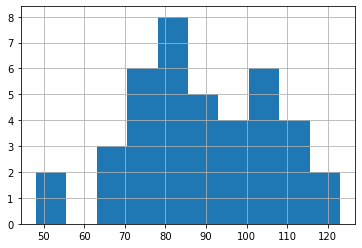

In [3]:
office_1 = pd.Series(stats.norm(90, 15).rvs(40))
office_1.hist()

<AxesSubplot:>

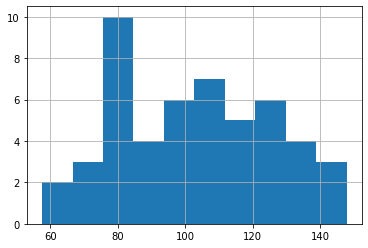

In [4]:
office_2 = pd.Series(stats.norm(100, 20).rvs(50))
office_2.hist()

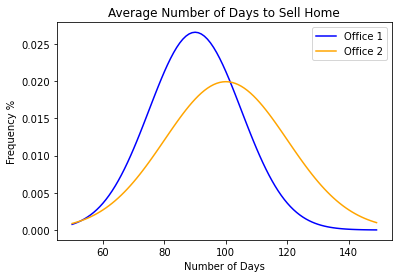

In [5]:
x = np.arange(50, 150)

y1 = stats.norm(90, 15).pdf(x)
y2 = stats.norm(100, 20).pdf(x)


plt.plot(x, y1, c='blue', label = 'Office 1')
plt.plot(x, y2, c='orange', label = 'Office 2')


plt.ylabel('Frequency %')
plt.xlabel('Number of Days')
plt.title('Average Number of Days to Sell Home')
plt.legend()

#### - b. Set Hypothesis

In [6]:
# HO - Mean sale time of Office 1 == mean sale time of Office 2. 
# Ha - Mean sale time of Office 1 != the mean sale time of Office 2. 

#### - c. Set Alpha

In [7]:
α = 0.05

#### - d. Assumptions

#### Normal: Yes!
#### Independent: Yes!
#### Variance:

In [8]:
office_1_var = 15**2
office_1_var

225

In [9]:
office_2_var = 20**2
office_2_var

400

#### - e. Compute Test Statistics

In [10]:

mean1 = 90
std1 = 15
nobs1 = 40

mean2 = 100 
std2 = 20
nobs2 = 50

# equal_var=False 
# alternative='two-sided'


t, p = stats.ttest_ind_from_stats(mean1, std1, nobs1, mean2, std2, nobs2, equal_var=False)
t, p

(-2.7091418459143854, 0.00811206270346016)

#### - f.   Decide

In [11]:
# Check if p < α

if p < α:
    print("We reject the H0")
else:
    print("We fail to reject H0")

We reject the H0


#### -Load the mpg dataset and use it to answer the following questions:

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
np.random.seed(123)

In [13]:
from pydataset import data
mpg = data('mpg') 

In [14]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


### 1. Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

#### - a. Distributions

In [15]:
mpg['fuel_efficiency'] = (mpg.cty + mpg.hwy) / 2

In [16]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_efficiency
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [17]:
cars_2008 = mpg[mpg.year == 2008].fuel_efficiency
cars_2008.head()

3     25.5
4     25.5
7     22.5
10    24.0
11    23.0
Name: fuel_efficiency, dtype: float64

In [18]:
cars_1999 = mpg[mpg.year == 1999].fuel_efficiency
cars_1999.head()

1    23.5
2    25.0
5    21.0
6    22.0
8    22.0
Name: fuel_efficiency, dtype: float64

<AxesSubplot:>

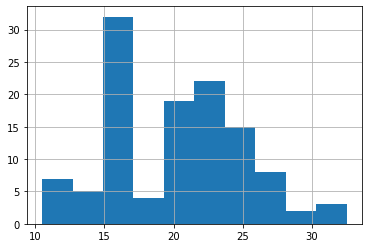

In [19]:
cars_2008.hist()

<AxesSubplot:>

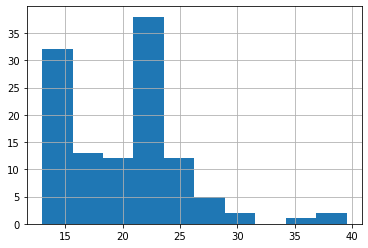

In [20]:
cars_1999.hist()

#### - b. Set Hypothesis

In [21]:
#H0 - Fuel efficiency in cars from 2008 == fuel efficiency in cars from 1999.
#Ha - Fuel efficiency in cars from 2008 != fuel efficiency in cars from 1999.

#### - c. Set Alpha

In [22]:
α = 0.05

#### - d. Assumptions

#### Normal: Yes!
#### Independent: Yes!
#### Variance:

In [23]:
print(cars_2008.var())

24.097480106100797


In [24]:
print(cars_1999.var())

27.122605363984682


#### - e. Compute Test Statistics

In [25]:
t, p = stats.ttest_ind(cars_2008, cars_1999, equal_var = False)
t, p

(-0.21960177245940962, 0.8263750772060638)

#### - f.  Decide

In [26]:
if p < α:
    print("We reject the H0.")
else:
    print("We fail to reject the H0.")

We fail to reject the H0.


### 2. Are compact cars more fuel-efficient than the average car?

#### - a. Distributions

In [27]:
mpg.head()

# sub-sample vs. entire population

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_efficiency
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [28]:
mpg = mpg.rename(columns={'class' : 'class_type'})
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class_type,fuel_efficiency
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [29]:
compact_cars = mpg[mpg.class_type == 'compact'].fuel_efficiency
compact_cars.head()

1    23.5
2    25.0
3    25.5
4    25.5
5    21.0
Name: fuel_efficiency, dtype: float64

In [30]:
overall_fuel_efficiency = mpg.fuel_efficiency.mean()
overall_fuel_efficiency

20.14957264957265

<AxesSubplot:>

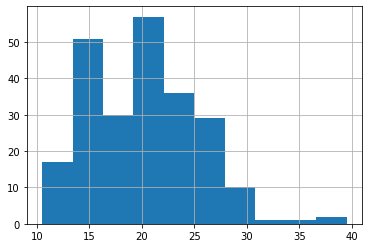

In [31]:
mpg.fuel_efficiency.hist()

In [32]:
compact_fuel_efficiency = mpg[mpg.class_type == 'compact'].fuel_efficiency
compact_fuel_efficiency.head()

1    23.5
2    25.0
3    25.5
4    25.5
5    21.0
Name: fuel_efficiency, dtype: float64

<AxesSubplot:>

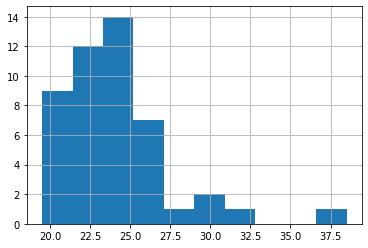

In [33]:
compact_fuel_efficiency.hist()

#### - b. Set Hypothesis

In [34]:
#H0 - Compact car fuel-efficicency = the average car fuel_efficiency.
#Ha - Compact cars fuel-efficiency is > the average car fuel-efficiency.

#### - c. Set Alpha

In [35]:
α = 0.05

#### - d. Assumptions

#### Normal: Yes!

#### - e. Compute Test Statistics

In [36]:
t, p = stats.ttest_1samp(compact_fuel_efficiency, overall_fuel_efficiency, alternative = 'greater')
t, p

(7.896888573132535, 2.0992818971585668e-10)

#### - f.  Decide

In [37]:
if (p < α) & (t > 0):
    print("We reject the H0.")
else:
     print("We fail to reject the H0.")

We reject the H0.


### 3. Do manual cars get better gas mileage than automatic cars?

#### - a. Distributions

In [38]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class_type,fuel_efficiency
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [39]:
mpg.trans.value_counts()

auto(l4)      83
manual(m5)    58
auto(l5)      39
manual(m6)    19
auto(s6)      16
auto(l6)       6
auto(av)       5
auto(s5)       3
auto(s4)       3
auto(l3)       2
Name: trans, dtype: int64

In [40]:
manuals = mpg[mpg.trans.str.contains('manual')].fuel_efficiency
manuals.head()

2     25.0
3     25.5
6     22.0
8     22.0
10    24.0
Name: fuel_efficiency, dtype: float64

In [41]:
automatic = mpg[mpg.trans.str.contains('auto')].fuel_efficiency
automatic.head()

1    23.5
4    25.5
5    21.0
7    22.5
9    20.5
Name: fuel_efficiency, dtype: float64

<AxesSubplot:>

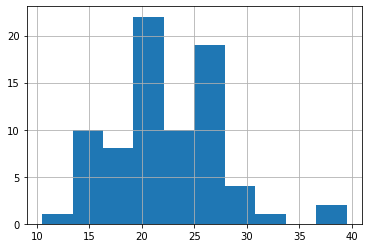

In [42]:
manuals.hist()

<AxesSubplot:>

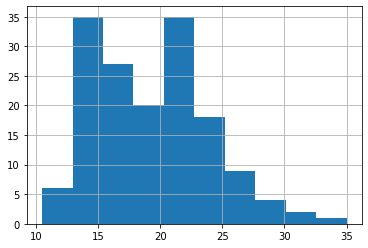

In [43]:
automatic.hist()

#### - b. Set Hypothesis

In [44]:
# H0- Manual cars gas mileage == automatic cars gas mileage.
# Ha - Manual cars gas mileage is > automatic cars gas mileage.

#### - c. Set Alpha

In [45]:
α = 0.05

#### - d. Assumptions

#### Normal: Yes!
#### Independent: Yes!
#### Variance:

In [46]:
manuals.var()

26.635167464114826

In [47]:
automatic.var()

21.942777233382337

#### - e. Compute Test Statistics

In [48]:
t, p = stats.ttest_ind(manuals, automatic, equal_var = False,  alternative = 'greater')
t, p

(4.443514012903071, 8.976124499958965e-06)

#### - f.  Decide

In [49]:
if (t > 0) & (p < α):
      print('Reject the N0.')
else:
      print('Fail to reject the N0.')

Reject the N0.


## Correlation 

#### 1. Use the telco_churn data. 

In [66]:
df = pd.read_csv('telco_churn.csv')
df.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,phone_service_type,internet_service,internet_service_type,contract_type,...,total_charges,teunure,monthly_charges_2,churn,is_female,has_churned,has_phone,has_internet,has_phone_and_internet,partner_dependents
0,0002-ORFBO,Female,0,Yes,Yes,1,One Line,1,DSL,1,...,593.30,9.044207,65.6,No,True,False,True,True,True,3
1,0003-MKNFE,Male,0,No,No,2,Two or More Lines,1,DSL,0,...,542.40,9.055092,59.9,No,False,False,True,True,True,0
2,0004-TLHLJ,Male,0,No,No,1,One Line,2,Fiber Optic,0,...,280.85,3.800406,73.9,Yes,False,True,True,True,True,0
3,0011-IGKFF,Male,1,Yes,No,1,One Line,2,Fiber Optic,0,...,1237.85,12.631122,98,Yes,False,True,True,True,True,1
4,0013-EXCHZ,Female,1,Yes,No,1,One Line,2,Fiber Optic,0,...,267.40,3.187128,83.9,Yes,True,True,True,True,True,1


In [67]:
df.dtypes

customer_id                object
gender                     object
is_senior_citizen           int64
partner                    object
dependents                 object
phone_service               int64
phone_service_type         object
internet_service            int64
internet_service_type      object
contract_type               int64
contract_description       object
payment_type               object
monthly_charges           float64
total_charges             float64
teunure                   float64
monthly_charges_2          object
churn                      object
is_female                    bool
has_churned                  bool
has_phone                    bool
has_internet                 bool
has_phone_and_internet       bool
partner_dependents          int64
dtype: object

In [68]:
nan_values = df.isna().any()

print (nan_values)

customer_id               False
gender                    False
is_senior_citizen         False
partner                   False
dependents                False
phone_service             False
phone_service_type        False
internet_service          False
internet_service_type     False
contract_type             False
contract_description      False
payment_type              False
monthly_charges           False
total_charges              True
teunure                   False
monthly_charges_2         False
churn                     False
is_female                 False
has_churned               False
has_phone                 False
has_internet              False
has_phone_and_internet    False
partner_dependents        False
dtype: bool


#### 1a. Does tenure correlate with monthly charges? 

In [69]:
x = df.teunure
y = df.monthly_charges

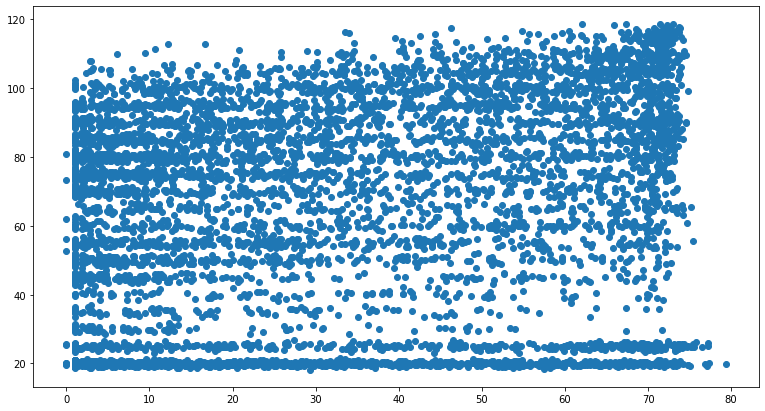

In [73]:
plt.figure(figsize = (13,7))
plt.scatter(x, y)

#### Hypothesis

In [55]:
α = 0.05
# H0 - There is no linear relationship between tenure and monthly charges.
# H1 - There is a linear realtionship between tenure and monthly charges. 

#### Calculate test statistic + p-value

In [56]:
r, p = stats.pearsonr(x,y)
print('r =', r)
print('p =', p)

r = 0.2472032380467264
p = 1.2381721068052338e-98


#### Conclusion

In [71]:
# Because p is less than \alpha, we reject the null hypothesis that there is no linear correlation between tenure and monthly charges.    

#### 1b. Does tenure correlatet with total charges? 

#### Setup -1. Acquire Dataset

In [79]:
df = df.dropna()
df.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,phone_service_type,internet_service,internet_service_type,contract_type,...,total_charges,teunure,monthly_charges_2,churn,is_female,has_churned,has_phone,has_internet,has_phone_and_internet,partner_dependents
0,0002-ORFBO,Female,0,Yes,Yes,1,One Line,1,DSL,1,...,593.30,9.044207,65.6,No,True,False,True,True,True,3
1,0003-MKNFE,Male,0,No,No,2,Two or More Lines,1,DSL,0,...,542.40,9.055092,59.9,No,False,False,True,True,True,0
2,0004-TLHLJ,Male,0,No,No,1,One Line,2,Fiber Optic,0,...,280.85,3.800406,73.9,Yes,False,True,True,True,True,0
3,0011-IGKFF,Male,1,Yes,No,1,One Line,2,Fiber Optic,0,...,1237.85,12.631122,98,Yes,False,True,True,True,True,1
4,0013-EXCHZ,Female,1,Yes,No,1,One Line,2,Fiber Optic,0,...,267.40,3.187128,83.9,Yes,True,True,True,True,True,1


In [82]:
nan_values = df.isna().any()

print (nan_values)

customer_id               False
gender                    False
is_senior_citizen         False
partner                   False
dependents                False
phone_service             False
phone_service_type        False
internet_service          False
internet_service_type     False
contract_type             False
contract_description      False
payment_type              False
monthly_charges           False
total_charges             False
teunure                   False
monthly_charges_2         False
churn                     False
is_female                 False
has_churned               False
has_phone                 False
has_internet              False
has_phone_and_internet    False
partner_dependents        False
dtype: bool


#### Setup - 2. Plot Dataset

In [85]:
x = df.teunure
y = df.total_charges

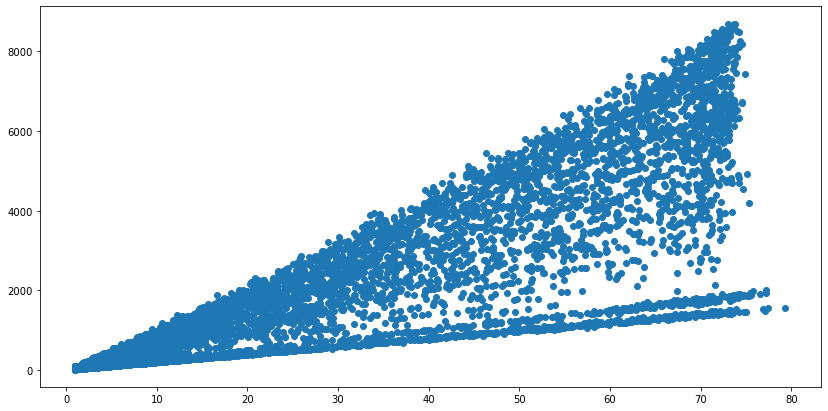

In [88]:
plt.figure(figsize = (14,7))
plt.scatter(x,y)

#### Setup - 3. Hypothesis and Alpha

In [91]:
α = 0.05
# H0 - There is no linear relationship between tenure and total charges.
# H1 - There is a linear realtionship between tenure and total charges. 

#### 2. Calculate test statistic + p-value

In [93]:
r, p = stats.pearsonr(x,y)
print('r =', r)
print('p =', p)

r = 0.8258274352556667
p = 0.0


#### 3. Conclusion

In [ ]:
# Because p is less than \alpha, we reject the null hypothesis that there is no linear correlation between tenure and total charges.    

#### 1c.What happens if you control for phone and internet service?
#### 1ci.  Phone
#### 1cii. Internet
#### 1ciii. Phone & Internet

#### 2. Use the employees database.
#### 2a. Is there a relationship between how long an employee has been with the company and their salary?
#### 2b. Is there a relationship between how long an employee has been with the company and the number of titles they have had?

#### 3. Use the sleepstudy data. 

##### Setup - 1. Aqcuire Dataset

#### Is there a relationship between days and reaction time?

In [60]:
from pydataset import data
df = data('sleepstudy') 
df.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [61]:
df.dtypes

Reaction    float64
Days          int64
Subject       int64
dtype: object

##### Setup - 2. Plot Dataset

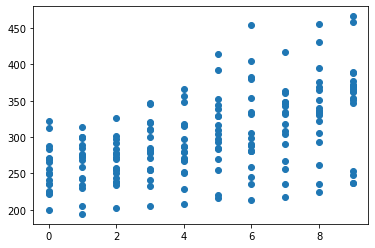

In [65]:
x = df.Days
y = df.Reaction

plt.scatter(x, y)

#### Setup - 3. Hypothesis

In [63]:
# H0 - There is no linear relationship between days and reaction time.
# H1 - There is a linear relatioship between days and reaction time. 

In [64]:
r, p = stats.pearsonr(df.Days, df.Reaction)

r, p

(0.5352302262650253, 9.894096322214812e-15)